In [1478]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from scipy.signal import decimate, welch
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize
from scipy.integrate import solve_ivp

## Estáticos

In [1479]:
speeds = pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured TrunkAcc').iloc[0].values[1:].astype(str)
subjects = list(pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured TrunkAcc').columns[1:].astype(str).str.split('.'))
subject_index = dict()
trial = 0
last_speed = '-1'
for i in range(len(subjects)):
    if speeds[i] != last_speed:
        trial = 0
    else:
        trial = trial + 1
    last_speed = speeds[i]
    subject_index[subjects[i][0]+','+speeds[i] + ','+ str(trial)] = i + 1

data_acc = pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured TrunkAcc', skiprows=2)

In [1480]:
data_grf = pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured GRF', skiprows=2)

In [1481]:
index = '1,2,0'
a1 = data_acc.iloc[:,subject_index[index]].values
time = data_acc.iloc[:,0].values[~np.isnan(a1)]
a1_s = a1[~np.isnan(a1)]
grf = data_grf.iloc[:,subject_index[index]].values
grf = grf[~np.isnan(grf)]
grf = decimate(grf, 30)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


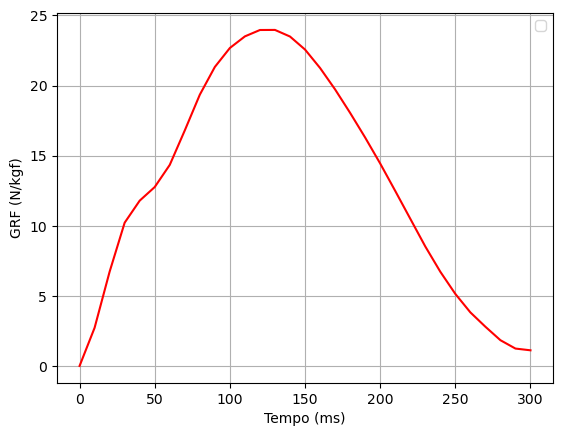

In [1482]:
plt.plot(time, grf, color='r')
plt.xlabel('Tempo (ms)')
plt.ylabel('GRF (N/kgf)')
plt.legend()
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


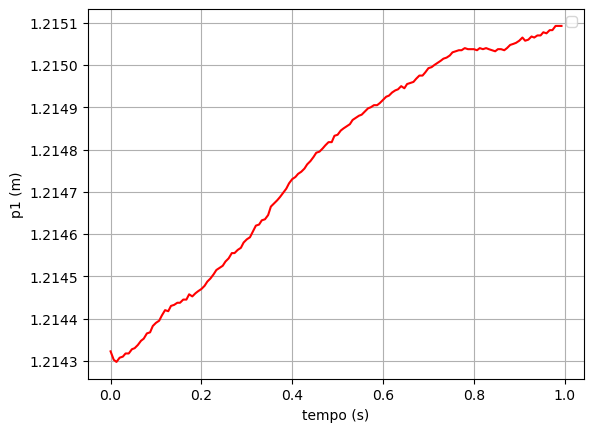

In [1483]:
#Dados estáticos

data_static = pd.read_csv('RBDS002static.txt', sep='\t')
te = data_static['Time'].values[1]
trunk_mm = (data_static[['R.ASISX', 'R.ASISY', 'R.ASISZ']].values + data_static[['L.ASISX', 'L.ASISY', 'L.ASISZ']].values + data_static[['R.PSISX', 'R.PSISY', 'R.PSISZ']].values + data_static[['L.PSISX', 'L.PSISY', 'L.PSISZ']].values)/4
time = data_static['Time'].values

p1 = trunk_mm[:,2]/1000
v1 = np.gradient(p1, time)          #m/s
a1 = np.gradient(v1, time)          #m/s²


plt.plot(time, trunk_mm[:,2]/1000,color="r")
plt.xlabel('tempo (s)')
plt.ylabel('p1 (m)')
plt.legend()
plt.grid(True)

In [1484]:
# pd.set_option('display.max_columns', None)
# data_static

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


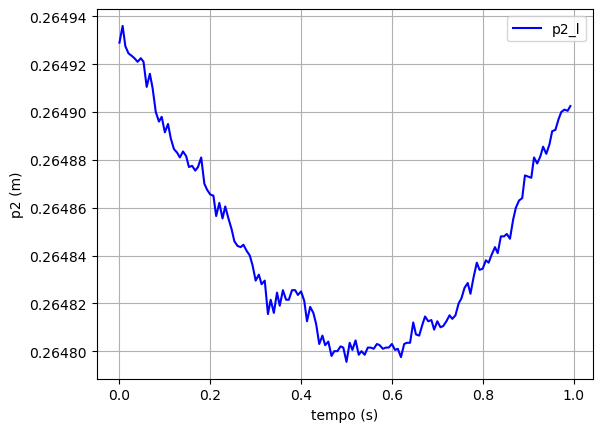

In [1485]:
#Avaliação individual de cada joelho estático:

# knee_l =data_static[['L.Shank.Top.MedialX','L.Shank.Top.MedialY','L.Shank.Top.MedialZ']].values     #joelho direito 
# knee_r =data_static[['R.Shank.Top.MedialX','R.Shank.Top.MedialY','R.Shank.Top.MedialZ']].values     #joelho esquerdo

knee = (data_static[['L.Shank.Top.MedialX','L.Shank.Top.MedialY','L.Shank.Top.MedialZ']].values + data_static[['R.Shank.Top.MedialX','R.Shank.Top.MedialY','R.Shank.Top.MedialZ']].values)/2 
p2 = knee[:,1]/1000
v2 = np.gradient(p2, time)              #m/s
a2 = np.gradient(v2, time)              #m/s²

# p2_r = knee_r[:,1]/1000               #m
# v2_r = np.gradient(p2_r, dt)          #m/s
# a2_r = np.gradient(v2_r, dt)          #m/s²

# plt.plot(time, p2_l,label="p2_l", color="r")
# plt.plot(time, p2_r,label="p2_r", color="b")

plt.xlabel('Tempo (s)')
plt.ylabel('p2 (m)')
plt.legend()
plt.grid(True)
plt.plot(time, p2,label="p2_l", color="b")
plt.xlabel('tempo (s)')
plt.ylabel('p2 (m)')
plt.legend()
plt.grid(True)

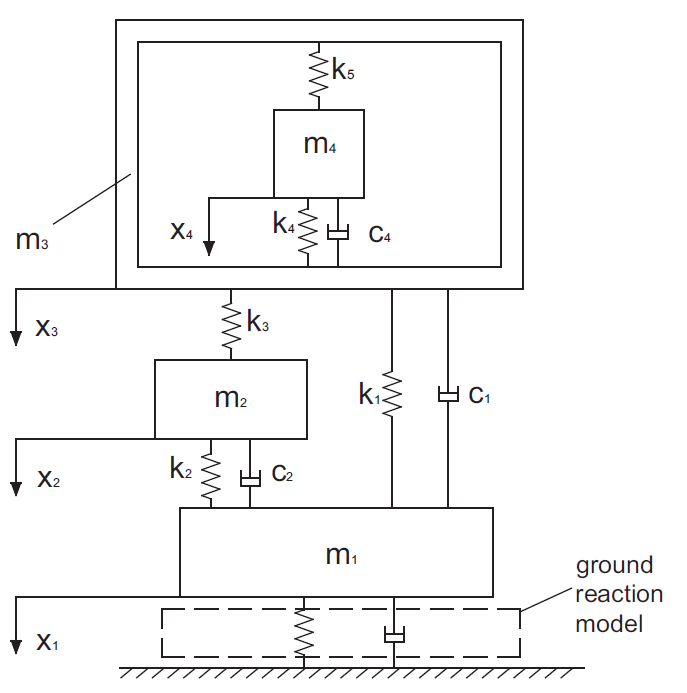

## Dinâmicos

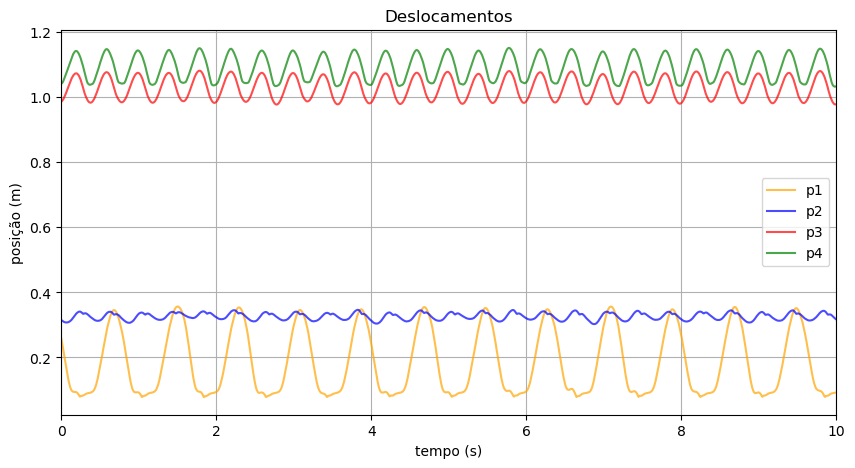

In [1486]:
data_dynamic = pd.read_csv('RBDS002runT25markers.txt', sep='\t')
td = data_dynamic['Time'].values[1]

heel_d = (data_dynamic[['R.Heel.TopX','R.Heel.TopY','R.Heel.TopZ']].values)

knee_d = (data_dynamic[['L.Shank.Top.MedialX','L.Shank.Top.MedialY','L.Shank.Top.MedialZ']].values + data_dynamic[['R.Shank.Top.MedialX','R.Shank.Top.MedialY','R.Shank.Top.MedialZ']].values)/2

trunk_d = (data_dynamic[['R.ASISX', 'R.ASISY', 'R.ASISZ']].values + data_dynamic[['L.ASISX', 'L.ASISY', 'L.ASISZ']].values + data_dynamic[['R.PSISX', 'R.PSISY', 'R.PSISZ']].values + data_dynamic[['L.PSISX', 'L.PSISY', 'L.PSISZ']].values)/4

crest_d = (data_dynamic[['R.Iliac.CrestX','R.Iliac.CrestY','R.Iliac.CrestZ']].values + data_dynamic[['L.Iliac.CrestX','L.Iliac.CrestY','L.Iliac.CrestZ']].values)/2

time_d = data_dynamic['Time'].values                              #s

p1_d = heel_d[:,1]/1000                                           #m
v1_d = np.gradient(p1_d, time_d)                                  #m/s
a1_d = np.gradient(v1_d, time_d)                                  #m

p2_d = knee_d[:,1]/1000                                           #m
v2_d = np.gradient(p2_d, time_d)                                  #m/s
a2_d = np.gradient(v2_d, time_d)                                  #m/s²

p3_d = trunk_d[:,1]/1000                                          #m  
v3_d = np.gradient(p3_d, time_d)                                  #m/s
a3_d = np.gradient(v3_d, time_d)                                  #m/s²

p4_d = crest_d[:,1]/1000                                          #m  
v4_d = np.gradient(p4_d, time_d)                                  #m/s
a4_d = np.gradient(v4_d, time_d)                                  #m/s²


plt.figure(figsize=(10,5))
plt.plot(time_d, p1_d, color="orange", alpha=0.7, label="p1")
plt.plot(time_d, p2_d, color="b",      alpha=0.7, label="p2")
plt.plot(time_d, p3_d, color="r",      alpha=0.7, label="p3")
plt.plot(time_d, p4_d, color="g",      alpha=0.7, label="p4")
plt.xlim(0, 10)
plt.xlabel("tempo (s)")
plt.ylabel("posição (m)")
plt.title("Deslocamentos")
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


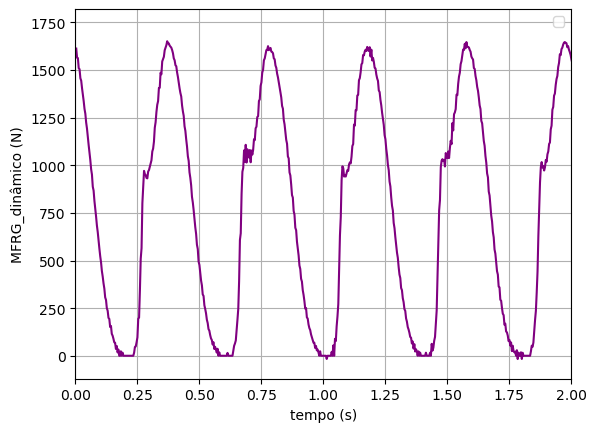

In [1487]:
Forces = pd.read_csv('RBDS002runT25forces.txt', sep='\t')
sample = Forces['Time'].values
MGRF = Forces[['Fy']].values
time_Fy = sample/300

plt.plot(time_Fy, MGRF, color='purple')
plt.xlim(0, 2)
plt.xlabel('tempo (s)')
plt.ylabel('MFRG_dinâmico (N)')
plt.legend()
plt.grid(True)

In [1488]:
#Parâmetros da amostra RBDS002static:

m = 80*9.81         # kgf
g = -9.81           # Valor em m/s².
dt = time_d[1]      # passo
m1 = m*0.0819       #kgf, posição: massa rígida da parte inferior do corpo (perna de suporte), ossos.
m2 = m*0.0799       #kgf, posição: massa oscilante da parte inferior do corpo, que corresponde aos tecidos moles como músculos e outros.
m3 = m*0.1676       #kgf, posição: massa rígida da parte superior do corpo, correspondendo principalmente aos ossos.
m4 = m*0.6706       #kgf, posição: massa oscilante da parte superior do corpo, que corresponde aos tecidos moles.

In [1489]:
#Otimizações (equações obtidas do artigo: Towards a foot wear design tool: Influence of shoe mid sole properties and ground stiffness on the impact force during running - Ly ) 

#Posição 1: 
# m1*a1_d = m1*g - Fg - k1*(p1_d - p3_d) - k2*(p1_d - p2_d) - c1*(v1_d - v3_d) - c2*(v1_d - v2_d)
# Fg = Ac*(a*(p1_d**2) + c*(p1_d**d)*(p1_d**e), para x1>0 e x1<=0, Fg=0

# alfa[0] = Fg_otm  [N]
# alfa[1] = k1_otim [N/m]
# alfa[2] = k2_otim [N/m]
# alfa[3] = c1_otim [Ns/m]
# alfa[4] = c2_otim [Ns/m]

def erro_0 (alfa, m1, a1_d, g, p1_d, p3_d, p2_d, v1_d, v2_d): 
    return np.sum((m1*a1_d - (m1*g - alfa[0] - alfa[1]*(p1_d - p3_d) - alfa[2]*(p1_d - p2_d) - alfa[3]*(v1_d - v3_d) - alfa[4]*(v1_d - v2_d)))**2)     
alfa = minimize (erro_0, [0,6000,6000,300,650], (m1, a1_d, g, p1_d, p3_d, p2_d, v1_d, v2_d), method='TNC', bounds=[(0,0),(4000,7000),(4000,7000),(200,600),(550,750)]).x     

Fg_otim =  alfa[0]
k1_otim =  alfa[1]
k2_otim =  alfa[2]
c1_otim =  alfa[3]
c2_otim =  alfa[4]

# #Posição 2:
#m2*a2_d = m2*g + k2*(p1_d - p2_d) - k3*(p2_d - p3_d) + c2*(v1_d - v2_d)

# beta[0] = k3_otim [kN/m]

def erro_1 (beta, m2, a2_d, g, k2_otim, p1_d, p2_d, p3_d, c2_otim, v1_d, v2_d): 
    return np.sum((m2*a2_d - (m2*g + k2_otim*(p1_d - p2_d) - beta[0]*(p2_d - p3_d) + c2_otim*(v1_d - v2_d)))**2)     
beta = minimize (erro_1, [10000], (m2, a2_d, g, k2_otim, p1_d, p2_d, p3_d, c2_otim, v1_d, v2_d), method='TNC', bounds=[(8000,12000)]).x     

k3_otim = beta[0]

# #Posição 3:
# m3*a3_d = m3*g + k1_otim*(p1_d - p3_d) + k3_otim*(p2_d - p3_d) - (k4 + k5)*(p3_d - p4_d) + c1_otim*(v1_d - v3_d) - c4*(v3_d - v4_d)

# gama[0] = k4_otim [kN/m]
# gama[1] = k5_otim [kN/m]
# gama[1] = c4_otim [kNs/m]


def erro_2 (gama, m3, a3_d, g, k1_otim, p1_d, p3_d, k3_otim,p2_d, p4_d, v1_d, v3_d, v4_d): 
    return np.sum((m3*a3_d - (m3*g + k1_otim*(p1_d - p3_d) + k3_otim*(p2_d - p3_d) - (gama[0] + gama[1])*(p3_d - p4_d) + c1_otim*(v1_d - v3_d) - gama[2]*(v3_d - v4_d)))**2)     
gama = minimize(erro_2, [10000,18000,1900], (m3, a3_d, g, k1_otim, p1_d, p3_d, k3_otim,p2_d, p4_d, v1_d, v3_d, v4_d), method='TNC', bounds=[(8000,12000),(16000,20000),(1700,2100)]).x     

k4_otim = gama[0]
k5_otim = gama[1]
c4_otim = gama[2]


print("Valores Otimizados:")
print(f"Fg_otim  = {Fg_otim}")
print(f"k1_otim = {k1_otim}")
print(f"k2_otim = {k2_otim}")
print(f"k3_otim = {k3_otim}")
print(f"k4_otim = {k4_otim}")
print(f"k5_otim = {k5_otim}")
print(f"c1_otim = {c1_otim}")
print(f"c2_otim = {c2_otim}")
print(f"c4_otim = {c4_otim}")

Valores Otimizados:
Fg_otim  = 0.0
k1_otim = 4000.0
k2_otim = 4000.0
k3_otim = 8000.0
k4_otim = 12000.0
k5_otim = 20000.0
c1_otim = 200.0
c2_otim = 550.0
c4_otim = 1700.0


In [ ]:
# Novo modelo artigo Zadpoor e Nikooyan, figura 5a com 4 massas.

M = sp.Matrix ([
    [m1, 0, 0, 0],
    [0, m2, 0, 0],
    [0, 0, m3, 0],
    [0, 0, 0, m4]])

C = sp.Matrix ([
    [c1_otim + c2_otim, -c2_otim, -c1_otim, 0],
    [-c2_otim, c2_otim, 0, 0],
    [-c1_otim, 0, c1_otim + c4_otim, -c4_otim],
    [0, 0, -c4_otim, c4_otim]])

K = sp.Matrix ([
    [k1_otim + k2_otim, -k2_otim, -k1_otim, 0],
    [-k2_otim, k2_otim + k3_otim, -k3_otim, 0],
    [-k1_otim, -k3_otim, k1_otim + k3_otim + k4_otim + k5_otim, -k4_otim - k5_otim],
    [0, 0, -k4_otim - k5_otim, k4_otim + k5_otim]])

W = sp.Matrix ([
    [m1*g - Fg_otim],
    [m2*g],
    [m3*g],
    [m4*g]])

In [1491]:
M_inv = M.inv()

λ = sp.Symbol('λ')

A = sp.Matrix ([
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [(-M_inv*K), (-M_inv*C)]])

pol_caract = A.charpoly(λ).as_expr()
raizes = A.eigenvals()

poly = sp.Poly(sp.expand(pol_caract), λ)
coeffs = [sp.N(c, 6) for c in poly.all_coeffs()]  
grau = poly.degree()

# Plotagem do polinômio e raízes:

termos = []
for i, coef in enumerate(coeffs):
    exp = grau - i
    if exp > 1:
        termos.append(f"{coef}*λ^{exp}")
    elif exp == 1:
        termos.append(f"{coef}*λ")
    else:
        termos.append(f"{coef}")


poly_str = " + ".join(termos)

print("Polinômio característico:\n")
print(f"P(λ) = {poly_str}")
print("\nRaízes:")
for r in raizes:
    real = sp.re(r)  
    imag = sp.im(r)  
    sgn = "+" if imag >= 0 else "-"
    print(f"λ = {real:.8f} {sgn} {abs(imag):.4f}*j")

Polinômio característico:

P(λ) = 1.00000*λ^8 + 38.1150*λ^7 + 1099.91*λ^6 + 16619.7*λ^5 + 193540*λ^4 + 1.19267E+6*λ^3 + 7.20103E+6*λ^2 + -2.08616E-7*λ + 0.00000409782

Raízes:
λ = -8.02973519 - 18.1454*j
λ = -9.57765668 - 10.8221*j
λ = -8.02973519 + 18.1454*j
λ = -9.57765668 + 10.8221*j
λ = -1.45012114 - 9.2449*j
λ = -1.45012114 + 9.2449*j
λ = 0.00000005 - 0.0000*j
λ = -0.00000005 - 0.0000*j


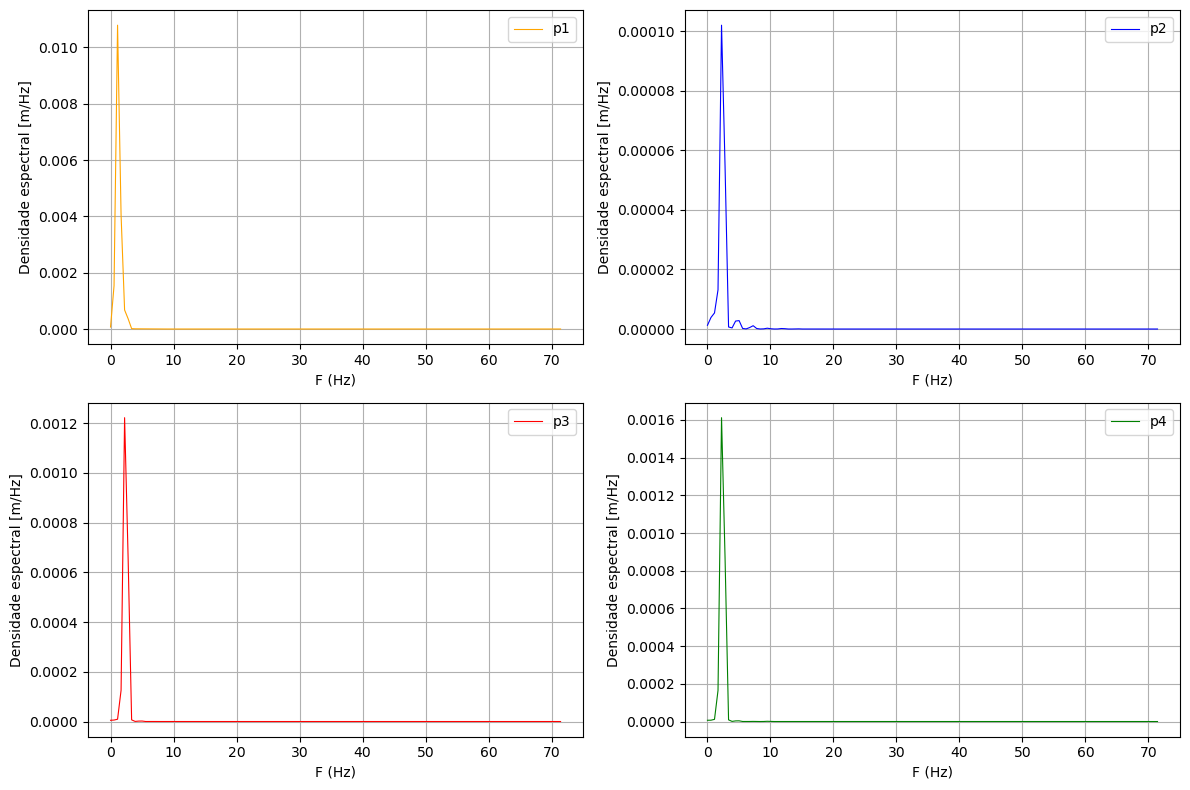

In [1492]:
#FFT para p1_d e p2_d (scipy fft welch)

fs = 1/dt

f_1,px_1 = welch (p1_d,fs=fs)    #f = frequencia [Hz] e px = densidade expectral [m/Hz]
f_2,px_2 = welch (p2_d,fs=fs)    #f = frequencia [Hz] e px = densidade expectral [m/Hz]
f_3,px_3 = welch (p3_d,fs=fs)    #f = frequencia [Hz] e px = densidade expectral [m/Hz]
f_4,px_4 = welch (p4_d,fs=fs)    #f = frequencia [Hz] e px = densidade expectral [m/Hz]

fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs[0,0].plot(f_1, px_1, color='orange', linewidth=0.8, label='p1')
axs[0,0].set_xlabel('F (Hz)')
axs[0,0].set_ylabel('Densidade espectral [m/Hz]')
axs[0,0].legend()
axs[0,0].grid(True)
axs[0,1].plot(f_2, px_2, color='b', linewidth=0.8, label='p2')
axs[0,1].set_xlabel('F (Hz)')
axs[0,1].set_ylabel('Densidade espectral [m/Hz]')
axs[0,1].legend()
axs[0,1].grid(True)
axs[1,0].plot(f_3, px_3, color='r', linewidth=0.8, label='p3')
axs[1,0].set_xlabel('F (Hz)')
axs[1,0].set_ylabel('Densidade espectral [m/Hz]')
axs[1,0].legend()
axs[1,0].grid(True)
axs[1,1].plot(f_4, px_4, color='g', linewidth=0.8, label='p4')
axs[1,1].set_xlabel('F (Hz)')
axs[1,1].set_ylabel('Densidade espectral [m/Hz]')
axs[1,1].legend()
axs[1,1].grid(True)
plt.tight_layout()
plt.show()



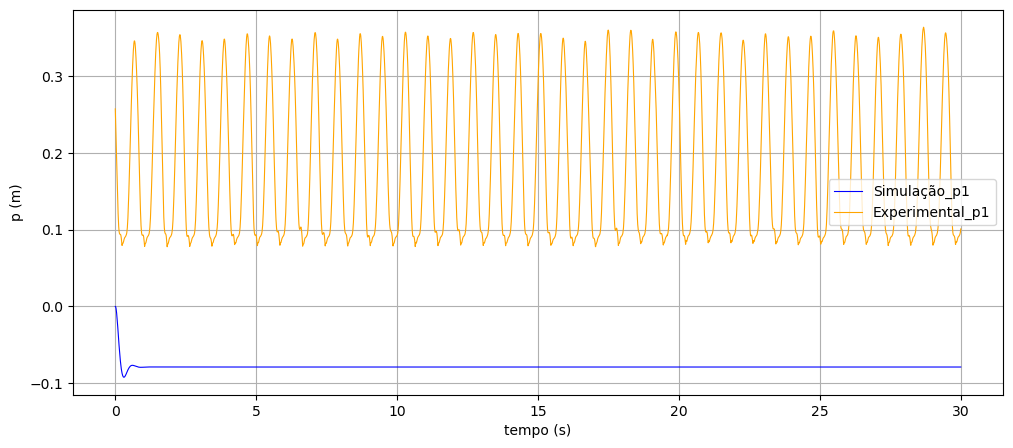

In [1493]:
# Método de Euler

p1_sim = np.zeros(len(time_d)); v1_sim = np.zeros(len(time_d)); a1_sim = np.zeros(len(time_d))
p2_sim = np.zeros(len(time_d)); v2_sim = np.zeros(len(time_d)); a2_sim = np.zeros(len(time_d))
p3_sim = np.zeros(len(time_d)); v3_sim = np.zeros(len(time_d)); a3_sim = np.zeros(len(time_d))
p4_sim = np.zeros(len(time_d)); v4_sim = np.zeros(len(time_d)); a4_sim = np.zeros(len(time_d))


p1_sim[0] = 0 
p2_sim[0] = 0  
p3_sim[0] = 0  
p4_sim[0] = 0 

v1_sim[0] = 0 
v2_sim[0] = 0 
v3_sim[0] = 0 
v4_sim[0] = 0 


for i in range(len(time_d) - 1):
    
    dv1dt  = (m1*g - Fg_otim - k1_otim*(p1_sim[i] - p3_sim[i]) - k2_otim*(p1_sim[i] - p2_sim[i]) - c1_otim*(v1_sim[i] - v3_sim[i]) - c2_otim*(v1_sim[i] - v2_sim[i]))/m1

    dp1dt = v1_sim[i]

    v1_sim[i + 1] = v1_sim[i] + dv1dt*dt
    p1_sim[i + 1] = p1_sim[i] + dp1dt*dt


#a1_sim  = (m1*g - Fg_otim - k1_otim*(p1_sim[i] - p3_d[i]) - k2_otim*(p1_sim[i] - p2_d[i]) - c1_otim*(v1_sim[i] - v3_d[i]) - c2_otim*(v1_sim[i] - v2_d[i]))/m1

# a2_sim = (m2*g + k2_otim*(p1_sim[i] - p2_sim[i]) - k3_otim*(p2_sim[i] - p3_sim[i]) + c2_otim*(v1_sim[i] - v2_sim[i])
             
# a3_sim = ((m3*g + k1_otim*(p1_sim[i] - p3_sim[i]) + k3_otim*(p2_sim[i] - p3_sim[i]) - (k4_otim + k5_otim)*(p3_sim[i] - p4_sim[i]) + c1_otim*(v1_sim[i] - v3_sim[i]) - c4_otim*(v3_sim[i] - v4_sim[i]))/m2)/m3
    
# a4_sim = (m4*g + (k4_otim + k5_otim)*(p3_sim - p4_sim) + c4_otim*(p3_sim - p4_sim))/m4

    
plt.figure(figsize=(12, 5))
plt.plot(time_d, p1_sim, color='b', linewidth=0.8, label='Simulação_p1')
plt.plot(time_d, p1_d, color = 'orange', linewidth=0.8, label ="Experimental_p1")
plt.xlabel('tempo (s)')
plt.ylabel('p (m)')
plt.legend()
plt.grid(True)
plt.show()

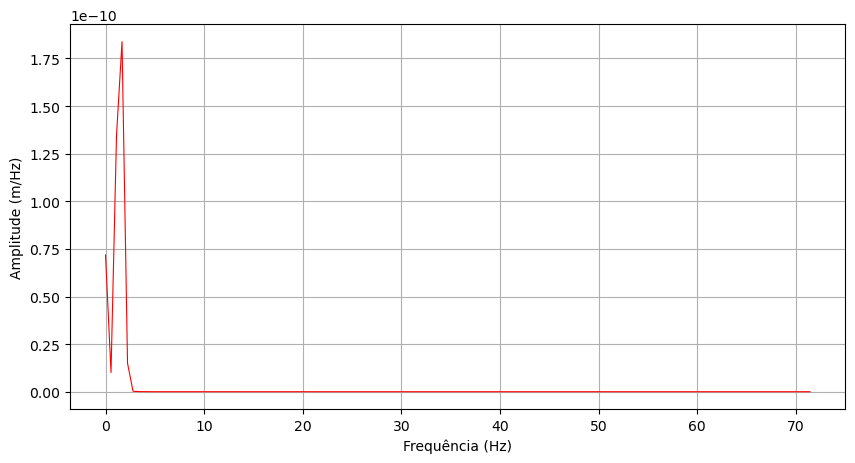

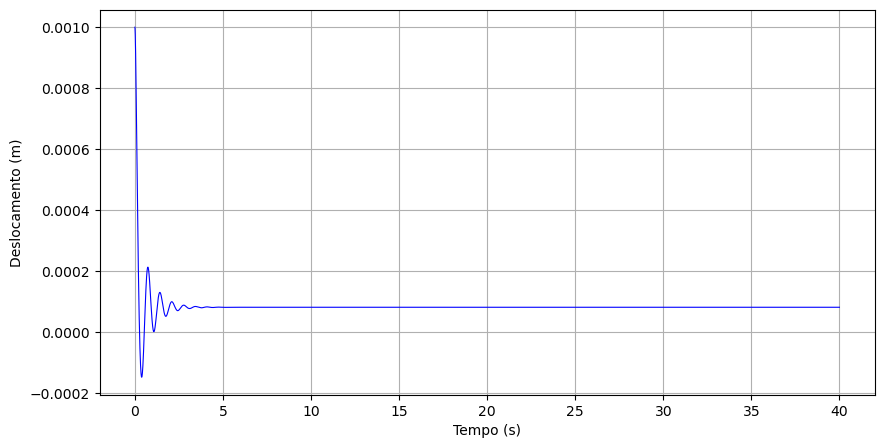

In [1494]:
#Função do sistema no tempo:
def state_space(t, z):
    return A @ z

#Condições iniciais
z0 = np.zeros(8)
z0[0] = 0.001  # deslocamento inicial

#Tempo de análise
dt = time_d[1]      
t_final = 40       
t_eval = np.arange(0, t_final, dt)


sol = solve_ivp(state_space, [0, t_final], z0, t_eval=t_eval, method='RK45')
x_t = sol.y[0, :]
fs = 1/dt
f_1,px_1 = welch (x_t,fs=fs)    


plt.figure(figsize=(10,5))
plt.plot(f_1, px_1, color='r',linewidth=0.8)
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude (m/Hz)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t_eval, x_t, color='b',linewidth=0.8)
plt.xlabel("Tempo (s)")
plt.ylabel("Deslocamento (m)")
plt.grid(True)
plt.show()

In [1495]:
## np.roots, usar fourier para achar as raizes das eq diferenciais. para encontrar a parte real positiva com 4 lambdas

##capitulo 2 

#Raízes reais negativas: modos amortecidos exponencialmente.

#Raízes complexas conjugadas com parte real negativa: modos oscilatórios amortecidos (sistema subamortecido).

#Raízes com parte real positiva: sistema instável.

##possiveis soluções: aumentar o ksi ou realimentação do sistema adicionar ganho de controle


# Parte real (σ)

# σ < 0 → decai → sistema estável.

# σ = 0 → permanece → marginalmente estável.

# σ > 0 → cresce → instável.

# Parte imaginária (ω_d)

# Relacionada à frequência oscilatória do modo em rad/s.

# Parte imaginária das raízes ↔ frequências dos picos na FFT.

# Parte real positiva ↔ amplitude crescendo no tempo.

# Fourier não calcula λ, mas valida e ajuda a diagnosticar modos dominantes.


# Interpretar os picos

# Cada pico no espectro corresponde a uma frequência imaginária de um par de raízes (
# 𝜔𝑑/2𝜋ω
# Se a parte real σ > 0, a amplitude cresce exponencialmente e você verá picos crescendo com o tempo ou sinais divergindo na simulação.


# #Posição 4:
# m4*a4 = m4*g + (k4 + k5)*(x3 - x4) + c4*(x3 - x4)

# # delta[0] = k5_otim [kN/m]

# def erro_3 (delta, m4, g, a4_d, v4_d, p4_d): 
#     return np.sum(m4*g - (m4*a4_d + delta[0]*v4_d + delta[1]*p4_d)**2)     
# delta = minimize(erro_3, [0,0], (m4, g, a4_d, v4_d, p4_d), method='TNC', bounds=((0,0),(0,0))).x     

# k5_otim = delta[0]

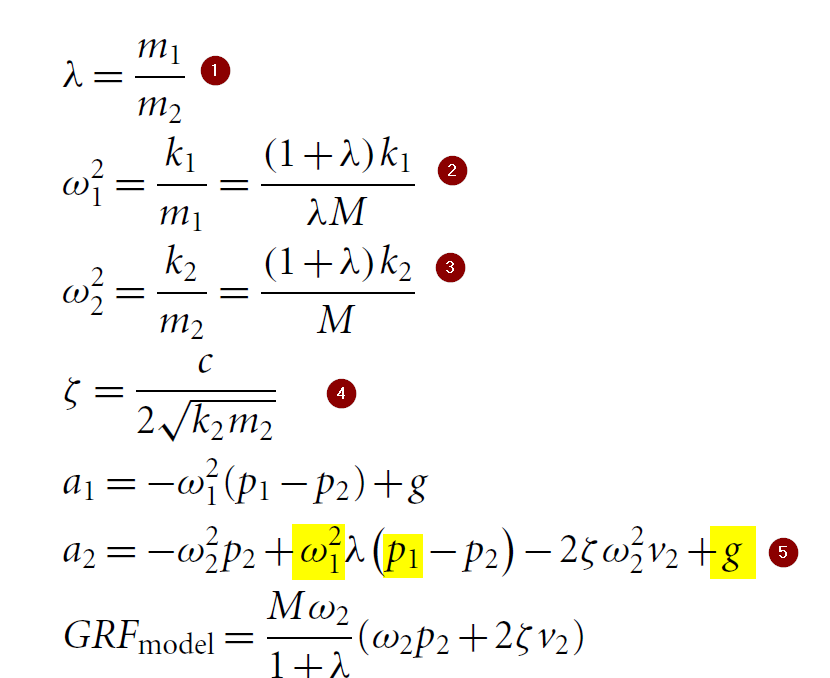



